# Fractal VR - Behavioral Analysis

Structured notebook

**Logistics**

In [ ]:
# Turn off warnings
defaultW <- getOption("warn") 
options(warn = -1) 
options(warn = defaultW)

# Analysis
library(ez)
citation("ez")
library(emmeans)
citation("emmeans")

# Plotting and formatting
library(cowplot)
library(dplyr)
library(readr) 
library(ggplot2)
library(lmerTest)
library(hrbrthemes)
library(sjPlot)
library(sjmisc)
library(sjlabelled)
# Raincloud plot( from https://github.com/RainCloudPlots/RainCloudPlots):
source('R_rainclouds.R')
library(tidyr)
library(tidyverse)
library(ggthemes)
library(ggpubr)
# Formatting
library(knitr)
library(jtools)
library(apaTables)
# Reliability
library(psych)
library(tidyr)
library(boot)


In [ ]:
# Logistics - directories

root <- '/Volumes/IMS_Drive3/FractalVR/'

tmt_data <- paste0(root, 'data/tmt/')

ratings_data <- paste0(root, 'data/rating.xlsx')

# list of excluded participants: "0DT2", "JGMJ5P", "MX16R1", "VU30R8"

excluded <- c("sub_YG0DT2", "sub_JGMJ5P", "sub_MX16R1", "sub_VU30R8")

subjects = list.files(path = tmt_data, pattern = "sub_", full.names = FALSE)
# print the list of the subjects
# print(subjects)
# count and print number of subjects
n_subjects = length(subjects)
print('Number of subjects:')
print(n_subjects)

# remove excluded subjects
excluded_files = paste0(excluded, "_TMT_behavior.csv")
for (i in 1:length(excluded_files)) {
  subjects = subjects[!grepl(excluded_files[i], subjects)]
}
# print new number of subjects
n_subjects = length(subjects)
print('Number of subjects after removing excluded:')
print(n_subjects)

library(readxl)
# red in the subjective rating
df <- read_excel(ratings_data, col_names = TRUE)

[1] "Number of subjects:"
[1] 40


[1] "Number of subjects after removing excluded:"
[1] 36


New names:
• `` -> `...1`


In [20]:
# Load the TMT data 

tmt_df <- data.frame()

for (i in 1:length(subjects)) {
  # if in excluded list, skip
    if (subjects[i] %in% excluded) {
        next
    }
    # read the data
    file_path <- paste0(tmt_data, subjects[i])
    temp_df <- read.csv(file_path, header = TRUE)
    # add the subject ID only separate _TMT_behavior.csv
    temp_df$subject <- gsub("_TMT_behavior.csv", "", subjects[i])
    #temp_df$subject <- subjects[i]
    # add the condition
    temp_df$condition <- ifelse(grepl("A", subjects[i]), "A", "B")
    # add the data to the main dataframe
    tmt_df <- rbind(tmt_df, temp_df)
}


## Subjective Judgements

1. Clean up. 
2. Diagnostics
3. Plotting

### Results:

Summary Statistics for Subjective Judgements: 

|Dimension     |ImageType |  Mean|    SD|
|:-------------|:---------|-----:|-----:|
|Liking        |L-E       | 46.45| 26.02|
|Liking        |M-E       | 44.48| 29.87|
|Liking        |H-E       | 36.38| 29.53|
|Liking        |L-S       | 38.20| 33.75|
|Liking        |M-S       | 56.05| 34.09|
|Liking        |H-S       | 55.83| 34.04|
|Naturalness   |L-E       | 23.60| 24.32|
|Naturalness   |M-E       | 20.35| 18.37|
|Naturalness   |H-E       | 13.72| 13.39|
|Naturalness   |L-S       | 54.40| 29.56|
|Naturalness   |M-S       | 76.67| 20.95|
|Naturalness   |H-S       | 71.69| 23.04|
|ApproachAvoid |L-E       | 58.33| 30.10|
|ApproachAvoid |M-E       | 55.75| 26.99|
|ApproachAvoid |H-E       | 51.55| 29.05|
|ApproachAvoid |L-S       | 53.85| 33.90|
|ApproachAvoid |M-S       | 70.40| 30.64|
|ApproachAvoid |H-S       | 67.92| 30.48|
|Stress        |L-E       | 37.15| 28.88|
|Stress        |M-E       | 48.58| 32.04|
|Stress        |H-E       | 57.62| 30.36|
|Stress        |L-S       | 39.02| 39.63|
|Stress        |M-S       | 26.85| 32.03|
|Stress        |H-S       | 33.75| 34.26|
|Relaxation    |L-E       | 43.60| 27.61|
|Relaxation    |M-E       | 35.83| 29.02|
|Relaxation    |H-E       | 24.87| 25.34|
|Relaxation    |L-S       | 44.17| 36.02|
|Relaxation    |M-S       | 63.20| 35.80|
|Relaxation    |H-S       | 58.88| 34.71|

In [ ]:
# Rename relevant columns for readability
column_mapping <- c(
  'v_130' = 'A1_Liking', 'v_131' = 'A1_Naturalness', 'v_143' = 'A1_ApproachAvoid', 'v_134' = 'A1_Stress', 'v_135' = 'A1_Relaxation',
  'v_136' = 'A2_Liking', 'v_137' = 'A2_Naturalness', 'v_144' = 'A2_ApproachAvoid', 'v_139' = 'A2_Stress', 'v_140' = 'A2_Relaxation',
  'v_141' = 'A3_Liking', 'v_142' = 'A3_Naturalness', 'v_145' = 'A3_ApproachAvoid', 'v_146' = 'A3_Stress', 'v_147' = 'A3_Relaxation',
  'v_148' = 'B1_Liking', 'v_149' = 'B1_Naturalness', 'v_150' = 'B1_ApproachAvoid', 'v_151' = 'B1_Stress', 'v_152' = 'B1_Relaxation',
  'v_153' = 'B2_Liking', 'v_154' = 'B2_Naturalness', 'v_155' = 'B2_ApproachAvoid', 'v_156' = 'B2_Stress', 'v_157' = 'B2_Relaxation',
  'v_158' = 'B3_Liking', 'v_159' = 'B3_Naturalness', 'v_160' = 'B3_ApproachAvoid', 'v_161' = 'B3_Stress', 'v_162' = 'B3_Relaxation'
)
colnames(df) <- dplyr::recode(colnames(df), !!!column_mapping)

# rename the first column to 'ID'
colnames(df)[1] <- 'ID'
df_data <- df

# Prepare dimensions and image types
dimensions <- c('Liking', 'Naturalness', 'ApproachAvoid', 'Stress', 'Relaxation')
old_labels <- c('A1', 'A2', 'A3', 'B1', 'B2', 'B3')
new_labels <- c('L-E', 'M-E', 'H-E', 'L-S', 'M-S', 'H-S')


# A1 = Low Exact; A2 = Medium Exact; A3 = High Exact
# B1 = Low Similar; B2 = Medium Similar; B3 = High Similar

# Convert it to long format, excluding the ID column
df_long <- df_data %>%
  pivot_longer(
    cols = -ID,  # Exclude the ID column
    names_to = c("ImageType", "Dimension"),
    names_sep = "_"
  ) %>%
  mutate(
    ImageType = factor(ImageType, levels = c("A1", "A2", "A3", "B1", "B2", "B3")),
    Dimension = factor(Dimension, levels = c("Liking", "Naturalness", "ApproachAvoid", "Stress", "Relaxation"))
  )

# Change image type labels
df_long$ImageType <- recode(df_long$ImageType,
                            "A1" = "L-E",
                            "A2" = "M-E",
                            "A3" = "H-E",
                            "B1" = "L-S",
                            "B2" = "M-S",
                            "B3" = "H-S")

# Create variable FD_level: Low, Medium, High
df_long$FD_level <- recode(df_long$ImageType,
                           "L-E" = "Low",
                           "M-E" = "Medium",
                           "H-E" = "High",
                           "L-S" = "Low",
                           "M-S" = "Medium",
                           "H-S" = "High")

# Create variable Fractal_type: Exact, Statistical
df_long$Fractal_type <- recode(df_long$ImageType,
                               "L-E" = "Exact",
                               "M-E" = "Exact",
                               "H-E" = "Exact",
                               "L-S" = "Statistical",
                               "M-S" = "Statistical",
                               "H-S" = "Statistical")

# Print head
head(df_long)




ID,ImageType,Dimension,value,FD_level,Fractal_type
<chr>,<fct>,<fct>,<dbl>,<fct>,<fct>
N6FGR8,L-E,Liking,35,Low,Exact
N6FGR8,L-E,Naturalness,27,Low,Exact
N6FGR8,L-E,ApproachAvoid,10,Low,Exact
N6FGR8,L-E,Stress,100,Low,Exact
N6FGR8,L-E,Relaxation,100,Low,Exact
N6FGR8,M-E,Liking,15,Medium,Exact


In [24]:
# flip the value 100 - value for each naturalness, approachavoid and stress

for (i in 1:nrow(df_long)) {
  if (df_long$Dimension[i] == "Naturalness" || df_long$Dimension[i] == "ApproachAvoid" || df_long$Dimension[i] == "Stress") {
    df_long$value[i] <- 100 - df_long$value[i]
  }
}
# Print head
head(df_long)

ID,ImageType,Dimension,value,FD_level,Fractal_type
<chr>,<fct>,<fct>,<dbl>,<fct>,<fct>
N6FGR8,L-E,Liking,35,Low,Exact
N6FGR8,L-E,Naturalness,73,Low,Exact
N6FGR8,L-E,ApproachAvoid,90,Low,Exact
N6FGR8,L-E,Stress,0,Low,Exact
N6FGR8,L-E,Relaxation,100,Low,Exact
N6FGR8,M-E,Liking,15,Medium,Exact


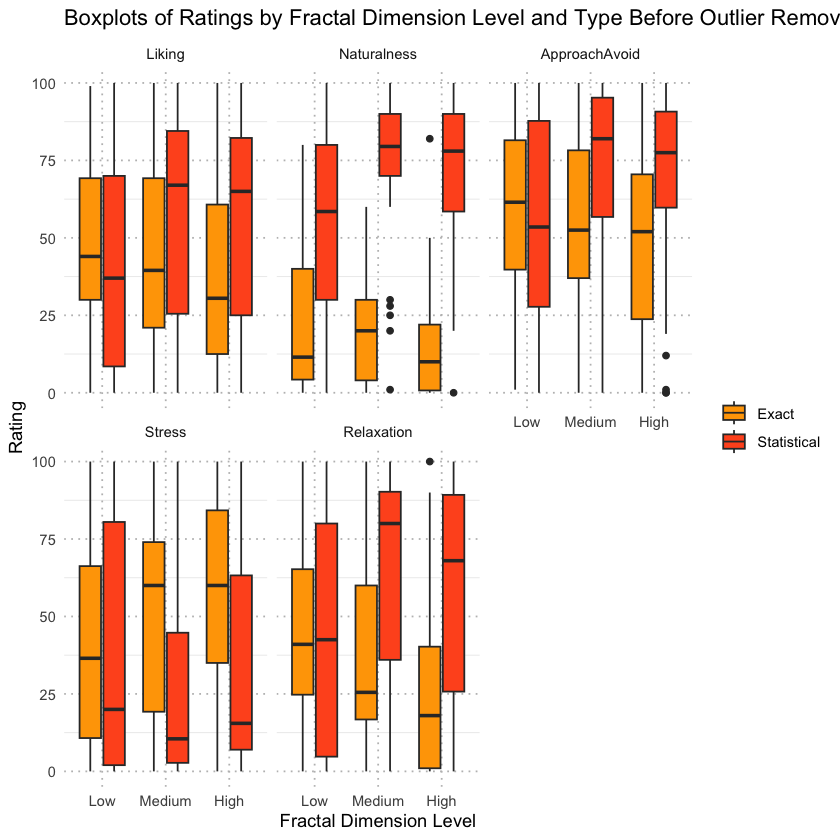

In [26]:
# create boxplot value ~ FD_level x Fractal_type wrap by Dimension

ggplot(df_long, aes(x = FD_level, y = value, fill = Fractal_type)) +
  geom_boxplot() +
  facet_wrap(~ Dimension) +
  scale_fill_manual(values = c('orange', '#ff5722')) +
  labs(
    x = "Fractal Dimension Level",
    y = "Rating",
    title = "Boxplots of Ratings by Fractal Dimension Level and Type Before Outlier Removal",
  ) +
  theme_minimal() +
  theme(
    legend.title = element_blank(),
    panel.grid.major = element_line(color = "gray", linetype = "dotted")
  )

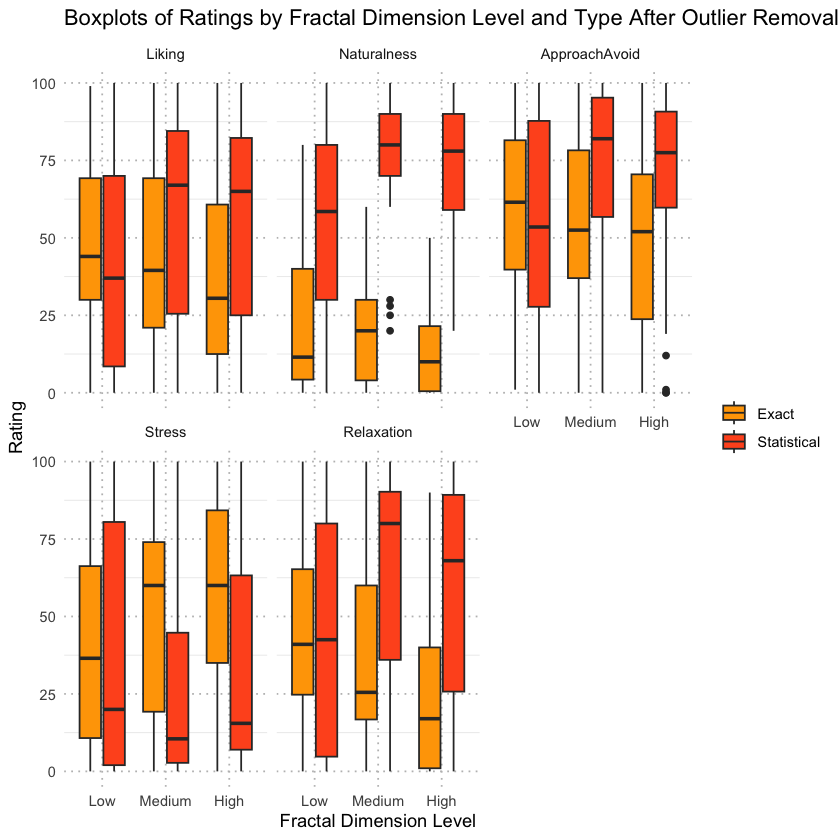

In [27]:
# remove outliers for each scale 2.5 SD
# Create a function to remove outliers

remove_outliers <- function(data, threshold = 2.5) {
  data %>%
    group_by(Dimension, ImageType) %>%
    mutate(
      mean_value = mean(value, na.rm = TRUE),
      sd_value = sd(value, na.rm = TRUE),
      z_score = (value - mean_value) / sd_value
    ) %>%
    filter(abs(z_score) <= threshold) %>%
    select(-mean_value, -sd_value, -z_score)
}
# Apply the function to the data
df_long_no_outliers <- remove_outliers(df_long, threshold = 2.5)

# Plot the data after outlier removal
ggplot(df_long_no_outliers, aes(x = FD_level, y = value, fill = Fractal_type)) +
  geom_boxplot() +
  facet_wrap(~ Dimension) +
  scale_fill_manual(values = c('orange', '#ff5722')) +
  labs(
    x = "Fractal Dimension Level",
    y = "Rating",
    title = "Boxplots of Ratings by Fractal Dimension Level and Type After Outlier Removal",
  ) +
  theme_minimal() +
  theme(
    legend.title = element_blank(),
    panel.grid.major = element_line(color = "gray", linetype = "dotted")
  )

**Summary Statistics**

In [36]:
# Create table with means and SDs for each dimension

df_long_no_outliers %>%
  group_by(Dimension, ImageType) %>%
  summarise(
    mean_value = mean(value, na.rm = TRUE),
    sd_value = sd(value, na.rm = TRUE)
  ) %>%
  ungroup() %>%
  arrange(Dimension, ImageType) %>%
  mutate(
    mean_value = round(mean_value, 2),
    sd_value = round(sd_value, 2)
  ) %>%
  rename(
    Dimension = Dimension,
    ImageType = ImageType,
    Mean = mean_value,
    SD = sd_value
  ) -> summary_table

# Print the summary table
knitr::kable(summary_table, format = "markdown")



`summarise()` has grouped output by 'Dimension'. You can override using the
`.groups` argument.




|Dimension     |ImageType |  Mean|    SD|
|:-------------|:---------|-----:|-----:|
|Liking        |L-E       | 46.45| 26.02|
|Liking        |M-E       | 44.48| 29.87|
|Liking        |H-E       | 36.38| 29.53|
|Liking        |L-S       | 38.20| 33.75|
|Liking        |M-S       | 56.05| 34.09|
|Liking        |H-S       | 55.83| 34.04|
|Naturalness   |L-E       | 23.60| 24.32|
|Naturalness   |M-E       | 20.35| 18.37|
|Naturalness   |H-E       | 13.72| 13.39|
|Naturalness   |L-S       | 54.40| 29.56|
|Naturalness   |M-S       | 76.67| 20.95|
|Naturalness   |H-S       | 71.69| 23.04|
|ApproachAvoid |L-E       | 58.33| 30.10|
|ApproachAvoid |M-E       | 55.75| 26.99|
|ApproachAvoid |H-E       | 51.55| 29.05|
|ApproachAvoid |L-S       | 53.85| 33.90|
|ApproachAvoid |M-S       | 70.40| 30.64|
|ApproachAvoid |H-S       | 67.92| 30.48|
|Stress        |L-E       | 37.15| 28.88|
|Stress        |M-E       | 48.58| 32.04|
|Stress        |H-E       | 57.62| 30.36|
|Stress        |L-S       | 39.0

**Reliability Analysis**


`df_long_no_outliers`

In [49]:
# Repeated measures Anova on Liking

# Create a new dataframe for Liking
df_liking <- df_long_no_outliers %>%
  filter(Dimension == "Liking") %>%
  select(-Dimension)
# Convert FD_level and Fractal_type to factors
df_liking$FD_level <- factor(df_liking$FD_level, levels = c("Low", "Medium", "High"))
df_liking$Fractal_type <- factor(df_liking$Fractal_type, levels = c("Exact", "Statistical"))

# Run the repeated measures ANOVA
anova_liking <- ezANOVA(
  data = df_liking,
  dv = value,
  wid = ID,
  within = .(FD_level, Fractal_type),
  detailed = TRUE
)
# Print the ANOVA results
anova_liking
# post hoc pairwise comparisons

Adding missing grouping variables: `Dimension`
Warning message:
“Converting "ID" to factor for ANOVA.”


$ANOVA
                 Effect DFn DFd        SSn      SSd          F            p
1           (Intercept)   1  39 512912.604 67760.23 295.211392 8.640220e-20
2              FD_level   2  78   2522.158 38819.51   2.533885 8.586574e-02
3          Fractal_type   1  39   3458.004 96431.50   1.398528 2.441299e-01
4 FD_level:Fractal_type   2  78   8148.908 27140.09  11.709888 3.571958e-05
  p<.05        ges
1     * 0.69026713
2       0.01083990
3       0.01480251
4     * 0.03419597

$`Mauchly's Test for Sphericity`
                 Effect         W           p p<.05
2              FD_level 0.7934686 0.012332891     *
4 FD_level:Fractal_type 0.7686157 0.006737139     *

$`Sphericity Corrections`
                 Effect       GGe        p[GG] p[GG]<.05       HFe        p[HF]
2              FD_level 0.8288222 0.0967370130           0.8610300 0.0946120230
4 FD_level:Fractal_type 0.8120941 0.0001433881         * 0.8423567 0.0001145634
  p[HF]<.05
2          
4         *

In [ ]:
# Run the repeated measures ANOVA using aov
anova_liking <- aov(value ~ FD_level * Fractal_type + Error(ID/(FD_level * Fractal_type)), data = df_liking)

# Perform post hoc pairwise comparisons using Tukey's method
library(emmeans)

# Generate estimated marginal means
emmeans_liking <- emmeans(anova_liking, ~ FD_level * Fractal_type)

# Perform pairwise comparisons
pairwise_results <- pairs(emmeans_liking, adjust = "tukey")

pairwise_results

# Print the pairwise com

Note: re-fitting model with sum-to-zero contrasts



 contrast                              estimate   SE    df t.ratio p.value
 Low Exact - Medium Exact                 1.975 4.60 151.3   0.430  0.9981
 Low Exact - High Exact                  10.075 4.60 151.3   2.191  0.2480
 Low Exact - Low Statistical              8.250 7.27  61.6   1.135  0.8647
 Low Exact - Medium Statistical          -9.600 7.52  70.1  -1.277  0.7967
 Low Exact - High Statistical            -9.375 7.52  70.1  -1.247  0.8123
 Medium Exact - High Exact                8.100 4.60 151.3   1.762  0.4936
 Medium Exact - Low Statistical           6.275 7.52  70.1   0.834  0.9600
 Medium Exact - Medium Statistical      -11.575 7.27  61.6  -1.593  0.6063
 Medium Exact - High Statistical        -11.350 7.52  70.1  -1.509  0.6595
 High Exact - Low Statistical            -1.825 7.52  70.1  -0.243  0.9999
 High Exact - Medium Statistical        -19.675 7.52  70.1  -2.616  0.1068
 High Exact - High Statistical          -19.450 7.27  61.6  -2.677  0.0948
 Low Statistical - Medium